# Data Analysis of the Impact of Brand-Related Queries on CTR and Conversion Rate: Insights from Clustering

## 1. Introduction 

### Summary

The primary goal of this project is to analyze the impact of **brand-related queries** on **click-through rates (CTR)** and to explore how **brand presence** influences **user engagement**. This analysis tests the hypothesis that there is a **significant difference in CTR** between **brand-related search queries** and **non-brand-related search queries**. The project includes **exploratory data analysis (EDA)** and **clustering analysis**, particularly using **DBSCAN**, to uncover patterns within **brand-related search queries**. Despite challenges such as **data imbalances**, this project contributes to a deeper understanding of the relationship between **brand-related queries** and CTR, providing insights into how **segmented targeting strategies** can enhance advertising performance.


### 1.1 Objective

The goal of this project is to analyze the impact of **brand-related queries** on **click-through rates (CTR)** and **conversion rates**, with a focus on how the presence of brand-related keywords influences user engagement and behavior. By applying **clustering techniques** such as DBSCAN, this project aims to uncover detailed patterns within brand-related search queries and explore how segmented targeting can enhance advertising performance. This analysis also seeks to identify key insights that can guide more effective targeting strategies for brand-related products.

### 1.2 Problem Definition

The primary question driving this project is whether search queries that contain **brand-related keywords** lead to higher **click-through rates (CTR)** compared to those that do not. 

This question is significant because understanding the influence of **brand-related keyword presence** in search queries on **user engagement** can provide valuable insights for improving advertising strategies and targeting.

The hypothesis tested in this project is that **there is a significant difference in CTR between brand-related and non-brand-related search queries**. By analyzing this hypothesis, we aim to determine how **brand-related keyword presence** in search queries influences user engagement.


### 1.3 Dataset Description

**Source**: This dataset is sourced from the Kaggle page [Amazon Advertising Performance Metrics](https://www.kaggle.com/datasets/mayuriawati/amazon-advertising-performance-metrics/data), which includes performance metrics related to Amazon's advertising campaigns. The dataset provides detailed information on search queries, click counts, cart interactions, and purchase rates related to online advertisements.

**Key Variables**:

```search_query```: Specific keywords or phrases used by customers when searching for products on Amazon.  
```pur_purchase_rate```: The percentage of times the advertisement resulted in a customer making a purchase.  
```clk_click_rate```: The percentage of times the advertisement was clicked on relative to the number of times it was displayed.  
```imp_total_count```: The total number of times the advertisement was displayed to customers in search results or on product pages.  
```clk_total_count```: The total number of clicks on the advertisement.  
```cart_add_rate```: The percentage of times the advertisement resulted in a product being added to a customer's cart.  
```cart_total_count```: The total number of times customers added a product to their cart after clicking on the advertisement.  


## 2. Data Preparation and Preprocessing

### 2.1 Initial Observation

#### Dataset Overview

In [1]:
import pandas as pd
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Loading Data
# Make sure that the data file is in the same directory as the code file before running the code.

df = pd.read_csv('week_data.csv')
df

week                        search_query  search_query_score  \
0      Week 3                        sensory toys                   1   
1      Week 3  sensory toys for autistic children                   2   
2      Week 3           sensory toys for kids 5-7                   3   
3      Week 3                 autism sensory toys                   4   
4      Week 3             autism sensory products                   5   
...       ...                                 ...                 ...   
2584  Week 30             crazy glow bungee bandz                  96   
2585  Week 30  squishy toys for autistic children                  97   
2586  Week 30                         chew fidget                  98   
2587  Week 30       huggy wuggy leg stretchy toys                  99   
2588  Week 30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
0                  35253           815103            9794          1.2000   
1                  23354           509901            2677          0.5300   
2                   6531           141188            1959          1.3900   
3                   6932           149596            2073          1.3900   
4                   4218            85699            1329          1.5500   
...                  ...              ...             ...             ...   
2584                   2               85               5          0.0588   
2585                   2              429               5          0.0117   
2586                  43             4249              39          0.0092   
2587                   1               38               2          0.0526   
2588                   1               57               2          0.0351   

      clk_total_count  clk_click_rate  clk_ASIN_count  clk_ASIN_share  \
0                9358         26.5500              80          0.8500   
1                7784         33.3300              39          0.5000   
2                1812         27.7400              17          0.9400   
3                1829         26.3800              29          1.5900   
4                1173         27.8100              11          0.9400   
...               ...             ...             ...             ...   
2584                3          0.6000               2          0.6667   
2585               19          0.8636               2          0.1053   
2586               43          0.2966               1          0.0233   
2587                2          1.0000               2          1.0000   
2588                2          0.6667               2          1.0000   

      cart_total_count  cart_add_rate  cart_ASIN_count  cart_ASIN_share  \
0                 2899         8.2200               45           1.5500   
1                 2086         8.9300               26           1.2500   
2                  550         8.4200               11           2.0000   
3                  559         8.0600               11           1.9700   
4                  286         6.7800                5           1.7500   
...                ...            ...              ...              ...   
2584                 1         0.2000                1           1.0000   
2585                 5         0.2273                1           0.2000   
2586                19         0.1310                1           0.0526   
2587                 1         0.5000                1           1.0000   
2588                 1         0.3333                1           1.0000   

      pur_total_count  pur_purchase_rate  pur_ASIN_count pur_ASIN_share  
0                 526             1.4900              11           2.09  
1                 325             1.3900               9           2.77  
2                 116             1.7800               4           3.45  
3                  95             1.3700               3           3.16  
4                  16             0.3800               1   

#### Data Structure

In [2]:

print("Number of rows and columns:", df.shape) 
print("Column names and data types:")
print(df.dtypes)


print("First 5 rows of the dataset:") 
print(df.head())


print("Descriptive statistics:") 
print(df.describe())


print("Dataset information:") 
print(df.info())


Number of rows and columns: (2589, 19)
Column names and data types:
week                   object
search_query           object
search_query_score      int64
search_quey_volume      int64
imp_total_count         int64
imp_ASIN_count          int64
imp_ASIN_share        float64
clk_total_count         int64
clk_click_rate        float64
clk_ASIN_count          int64
clk_ASIN_share        float64
cart_total_count        int64
cart_add_rate         float64
cart_ASIN_count         int64
cart_ASIN_share       float64
pur_total_count         int64
pur_purchase_rate     float64
pur_ASIN_count          int64
pur_ASIN_share         object
dtype: object
First 5 rows of the dataset:
     week                        search_query  search_query_score  \
0  Week 3                        sensory toys                   1   
1  Week 3  sensory toys for autistic children                   2   
2  Week 3           sensory toys for kids 5-7                   3   
3  Week 3                 autism sensory to

- The column `search_quey_volume` is a typo in the dataset and actually represents 'search query volume'.

In [3]:
null_percentage = (df['pur_ASIN_share'].isnull().sum() / len(df)) * 100
null_percentage = round(null_percentage, 2)
print(f"Percentage of null values in 'pur_ASIN_share': {null_percentage}%")

Percentage of null values in 'pur_ASIN_share': 0.54%


### 2.2 Data Processing

In [4]:
# Missing Data
# Most of the data is non-null, and the 'pur_ASIN_share' column, which is the only one containing null values, has less than 1% null values. Therefore, we will drop all rows with null data.
df = df.dropna()

In [5]:
# Duplicate Check
duplicates = df.duplicated().sum() 
print("Number of Duplicates: ",duplicates)

Number of Duplicates:  0


In [6]:
# Convert 'Week' column as int
df['week'] = df['week'].str.replace(r'\D', '', regex=True)
df['week'] = df['week'].fillna(0).astype(int) #ignore warning message

C:\Users\EunseoS\AppData\Local\Temp\ipykernel_7120\3545928286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['week'].str.replace(r'\D', '', regex=True)
C:\Users\EunseoS\AppData\Local\Temp\ipykernel_7120\3545928286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['week'].fillna(0).astype(int) #ignore warning message


In [7]:
print(df['week'])

0        3
1        3
2        3
3        3
4        3
        ..
2584    30
2585    30
2586    30
2587    30
2588    30
Name: week, Length: 2575, dtype: int64


In [8]:
# CHECKING DATA IS CORRECT 

# Based on a sample of data used for calculation, 'clk_click_rate' is calculated using the 'search_quey_volume' and 'clk_total_count' columns.
# 'cart_add_rate' is calculated using 'search_quey_volume' and 'cart_total_count'. 
# 'pur_purchase_rate' is calculated using 'search_quey_volume' and 'pur_total_count'.

df.loc[:, 'CTR'] = df['clk_total_count'] / df['search_quey_volume'] * 100 # Click Through Rate = clk_total_count / search_query_volume * 100
df.loc[:, 'CTR'] = df['CTR'].round(2)
difference_count = (df.loc[:, 'clk_click_rate'] != df.loc[:, 'CTR']).sum() # Count the number of rows where 'clk_click_rate' and 'CTR' are different


print(difference_count) # Ignore the warning message


1990


C:\Users\EunseoS\AppData\Local\Temp\ipykernel_7120\932917072.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'CTR'] = df['clk_total_count'] / df['search_quey_volume'] * 100 # Click Through Rate = clk_total_count / search_query_volume * 100


In [9]:
differences = df[df['clk_click_rate'] != df['CTR']]
print(differences)

      week                        search_query  search_query_score  \
124      2               sensory stretchy toys                  25   
600     49                        sensory toys                   1   
601     49  sensory toys for autistic children                   2   
602     49          autistic toys for boys 5-7                   3   
603     49  toys for autistic children age 5-7                   4   
...    ...                                 ...                 ...   
2584    30             crazy glow bungee bandz                  96   
2585    30  squishy toys for autistic children                  97   
2586    30                         chew fidget                  98   
2587    30       huggy wuggy leg stretchy toys                  99   
2588    30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
124                   32              858              40          4.6600   
600  

- Upon inspecting the data, we identified calculation errors in several rows. For example, row 124 contains a rounding error, and row 600 has a decimal point notation error.  
- We will replace the values in these rows with the newly calculated CTR values and update the original `clk_click_rate` column accordingly. After updating the `clk_click_rate` column, we will delete the `CTR` column as it is no longer needed.


In [10]:
# Replace 'clk_click_rate' values with the newly calculated 'CTR' values for the rows with differences
df.loc[df['clk_click_rate'] != df['CTR'], 'clk_click_rate'] = df.loc[df['clk_click_rate'] != df['CTR'], 'CTR'].values 
df = df.drop(columns=['CTR'])

- Apply the same logic to the ```cart_add_rate``` column and ```pur_purchase_rate``` as well.

In [11]:
# cart_add_rate = cart_total_count / search_quey_volume * 100
# ATC(Add To Cart): The percentage of website visitors who add an item to their cart
df.loc[:, 'ATC'] = df['cart_total_count'] / df['search_quey_volume'] * 100

df.loc[:, 'ATC'] = df['ATC'].round(2) 

difference_count = (df['cart_add_rate'] != df['ATC']).sum() 

print(difference_count) 

1989


In [12]:
differences = df[df['cart_add_rate'] != df['ATC']]
print(differences)

      week                        search_query  search_query_score  \
600     49                        sensory toys                   1   
601     49  sensory toys for autistic children                   2   
602     49          autistic toys for boys 5-7                   3   
603     49  toys for autistic children age 5-7                   4   
604     49                  bunmo sensory toys                   5   
...    ...                                 ...                 ...   
2584    30             crazy glow bungee bandz                  96   
2585    30  squishy toys for autistic children                  97   
2586    30                         chew fidget                  98   
2587    30       huggy wuggy leg stretchy toys                  99   
2588    30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
600               132795          3017056           44620          0.0148   
601  

- Upon inspecting the data, we identified calculation errors in several rows. For example, row 600 has a decimal point notation error and row 2584 shows a calculation error.
- We will replace the values in these rows with the newly calculated ATC values and update the original `cart_add_rate` column accordingly. After updating the `cart_add_rate` column, we will delete the `ATC` column as it is no longer needed.

In [13]:
df.loc[df['cart_add_rate'] != df['ATC'], 'cart_add_rate'] = df.loc[df['cart_add_rate'] != df['ATC'], 'ATC'].values
df = df.drop(columns=['ATC'])

In [14]:
# pur_purchase_rate = pur_total_count / search_query_volume  * 100 
df.loc[:, 'PUR'] = df['pur_total_count'] / df['search_quey_volume'] * 100
df.loc[:, 'PUR'] = df['PUR'].round(2)
difference_count = (df.loc[:, 'pur_purchase_rate'] != df.loc[:, 'PUR']).sum()
print(difference_count)

1810


In [15]:
differences = df[df['pur_purchase_rate'] != df['PUR']]
print(differences)

      week                        search_query  search_query_score  \
124      2               sensory stretchy toys                  25   
600     49                        sensory toys                   1   
601     49  sensory toys for autistic children                   2   
602     49          autistic toys for boys 5-7                   3   
603     49  toys for autistic children age 5-7                   4   
...    ...                                 ...                 ...   
2578    30            sensory items for adults                  90   
2580    30                   sensory materials                  92   
2581    30            toddler chew toy sensory                  93   
2583    30                     alzheimers toys                  95   
2586    30                         chew fidget                  98   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
124                   32              858              40          4.6600   
600  

- Upon inspecting the data, we identified calculation errors in several rows. For example, row 124 contains a rounding error, and row 600 has a decimal point notation error.  
- We will replace the values in these rows with the newly calculated PUR values and update the original `pur_purchase_rate` column accordingly. After updating the `pur_purchase_rate` column, we will delete the `PUR` column as it is no longer needed.

In [16]:
df.loc[df['pur_purchase_rate'] != df['PUR'], 'pur_purchase_rate'] = df.loc[df['pur_purchase_rate'] != df['PUR'], 'PUR'].values
df = df.drop(columns=['PUR'])

In [17]:
# Cleaning up outliers('rate' column)
# Since the 'rate' columns represent percentages, their values should logically not exceed 100. However, after inspecting the data using describe(), values exceeding 100 were found, indicating the need for data correction.
over_100_rows = df[(df['clk_click_rate'] > 100) | 
                   (df['cart_add_rate'] > 100) | 
                   (df['pur_purchase_rate'] > 100)]

print(over_100_rows)

      week                        search_query  search_query_score  \
54       3  learning toys for kids with autism                  55   
127      2                        stim noodles                  28   
151      2           stretchy toy for toddlers                  52   
153      2                         fidgets asd                  54   
159      2                   todler autism toy                  60   
...    ...                                 ...                 ...   
2583    30                     alzheimers toys                  95   
2584    30             crazy glow bungee bandz                  96   
2585    30  squishy toys for autistic children                  97   
2587    30       huggy wuggy leg stretchy toys                  99   
2588    30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
54                    41             1074               2          0.1900   
127  

- A total of 537 rate outliers were found. This could occur due to a mismatch between `search_quey_volume` and actual behavior (e.g., multiple products being shown for the same query), or due to missing or duplicated data in `search_query_volume`. This observation suggests there may be issues with the data collection for the `search_query_volume` column.
- To preserve the data, we will apply clipping to the rate columns, limiting their values to 100.

In [18]:
# Clip the values of rate columns (clk_click_rate, cart_add_rate, pur_purchase_rate) to 100
df['clk_click_rate'] = df['clk_click_rate'].clip(upper=100)
df['cart_add_rate'] = df['cart_add_rate'].clip(upper=100)
df['pur_purchase_rate'] = df['pur_purchase_rate'].clip(upper=100)

In [19]:
df.describe()

week  search_query_score  search_quey_volume  imp_total_count  \
count  2575.000000         2575.000000        2.575000e+03     2.575000e+03   
mean     36.617476           50.455534        5.855398e+03     1.513293e+05   
std      13.788476           28.786616        7.639875e+04     1.785279e+06   
min       1.000000            1.000000        1.000000e+00     1.400000e+01   
25%      33.000000           26.000000        1.200000e+01     5.385000e+02   
50%      40.000000           50.000000        1.340000e+02     5.053000e+03   
75%      46.000000           75.000000        8.530000e+02     3.018950e+04   
max      52.000000          100.000000        3.313904e+06     7.767592e+07   

       imp_ASIN_count  imp_ASIN_share  clk_total_count  clk_click_rate  \
count     2575.000000     2575.000000      2575.000000     2575.000000   
mean       390.249709        0.451757      1647.321165       58.924478   
std       2066.258584        1.045654     14526.554816       32.195466   
min          1.000000        0.000000         1.000000        5.330000   
25%         10.000000        0.007200         9.000000       29.155000   
50%         60.000000        0.017800        67.000000       48.310000   
75%        243.500000        0.064850       374.500000      100.000000   
max      47625.000000       11.110000    570036.000000      100.000000   

       clk_ASIN_count  clk_ASIN_share  cart_total_count  cart_add_rate  \
count     2575.000000     2575.000000       2575.000000    2575.000000   
mean         4.864466        4.090996        514.140194      31.258318   
std         20.433603       15.875465       4753.796453      29.971710   
min          0.000000        0.000000          1.000000       0.260000   
25%          1.000000        0.011300          4.000000       8.640000   
50%          2.000000        0.076900         21.000000      18.420000   
75%          3.000000        0.880000        111.000000      44.435000   
max        574.000000      100.000000     184445.000000     100.000000   

       cart_ASIN_count  cart_ASIN_share  pur_total_count  pur_purchase_rate  \
count      2575.000000      2575.000000      2575.000000        2575.000000   
mean          2.701748         5.977720       130.405825          15.321379   
std          10.354984        19.874344      1813.030974          27.265076   
min           0.000000         0.000000         0.000000           0.000000   
25%           1.000000         0.022700         1.000000           1.450000   
50%           1.000000         0.166700         5.000000           3.720000   
75%           2.000000         1.000000        21.500000          12.285000   
max         301.000000       100.000000     76767.000000         100.000000   

       pur_ASIN_count  
count     2575.000000  
mean         1.043107  
std          3.364898  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max        103.000000

In [20]:
# copy dataframe for later use(deep learning)
new_df = df.copy()
new_df

week                        search_query  search_query_score  \
0        3                        sensory toys                   1   
1        3  sensory toys for autistic children                   2   
2        3           sensory toys for kids 5-7                   3   
3        3                 autism sensory toys                   4   
4        3             autism sensory products                   5   
...    ...                                 ...                 ...   
2584    30             crazy glow bungee bandz                  96   
2585    30  squishy toys for autistic children                  97   
2586    30                         chew fidget                  98   
2587    30       huggy wuggy leg stretchy toys                  99   
2588    30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  imp_ASIN_count  imp_ASIN_share  \
0                  35253           815103            9794          1.2000   
1                  23354           509901            2677          0.5300   
2                   6531           141188            1959          1.3900   
3                   6932           149596            2073          1.3900   
4                   4218            85699            1329          1.5500   
...                  ...              ...             ...             ...   
2584                   2               85               5          0.0588   
2585                   2              429               5          0.0117   
2586                  43             4249              39          0.0092   
2587                   1               38               2          0.0526   
2588                   1               57               2          0.0351   

      clk_total_count  clk_click_rate  clk_ASIN_count  clk_ASIN_share  \
0                9358           26.55              80          0.8500   
1                7784           33.33              39          0.5000   
2                1812           27.74              17          0.9400   
3                1829           26.38              29          1.5900   
4                1173           27.81              11          0.9400   
...               ...             ...             ...             ...   
2584                3          100.00               2          0.6667   
2585               19          100.00               2          0.1053   
2586               43          100.00               1          0.0233   
2587                2          100.00               2          1.0000   
2588                2          100.00               2          1.0000   

      cart_total_count  cart_add_rate  cart_ASIN_count  cart_ASIN_share  \
0                 2899           8.22               45           1.5500   
1                 2086           8.93               26           1.2500   
2                  550           8.42               11           2.0000   
3                  559           8.06               11           1.9700   
4                  286           6.78                5           1.7500   
...                ...            ...              ...              ...   
2584                 1          50.00                1           1.0000   
2585                 5         100.00                1           0.2000   
2586                19          44.19                1           0.0526   
2587                 1         100.00                1           1.0000   
2588                 1         100.00                1           1.0000   

      pur_total_count  pur_purchase_rate  pur_ASIN_count pur_ASIN_share  
0                 526               1.49              11           2.09  
1                 325               1.39               9           2.77  
2                 116               1.78               4           3.45  
3                  95               1.37               3           3.16  
4                  16               0.38               1           6.25  
...               

In [21]:
# Delete unnecessary columns for data analysis phase
columns_to_drop = [ 'imp_ASIN_count', 'imp_ASIN_share', 
                   'clk_ASIN_count', 'clk_ASIN_share', 'cart_ASIN_count', 
                   'cart_ASIN_share', 'pur_ASIN_count', 'pur_ASIN_share']

df.drop(columns=columns_to_drop, inplace=True)
df

week                        search_query  search_query_score  \
0        3                        sensory toys                   1   
1        3  sensory toys for autistic children                   2   
2        3           sensory toys for kids 5-7                   3   
3        3                 autism sensory toys                   4   
4        3             autism sensory products                   5   
...    ...                                 ...                 ...   
2584    30             crazy glow bungee bandz                  96   
2585    30  squishy toys for autistic children                  97   
2586    30                         chew fidget                  98   
2587    30       huggy wuggy leg stretchy toys                  99   
2588    30                  silicone toys kids                 100   

      search_quey_volume  imp_total_count  clk_total_count  clk_click_rate  \
0                  35253           815103             9358           26.55   
1                  23354           509901             7784           33.33   
2                   6531           141188             1812           27.74   
3                   6932           149596             1829           26.38   
4                   4218            85699             1173           27.81   
...                  ...              ...              ...             ...   
2584                   2               85                3          100.00   
2585                   2              429               19          100.00   
2586                  43             4249               43          100.00   
2587                   1               38                2          100.00   
2588                   1               57                2          100.00   

      cart_total_count  cart_add_rate  pur_total_count  pur_purchase_rate  
0                 2899           8.22              526               1.49  
1                 2086           8.93              325               1.39  
2                  550           8.42              116               1.78  
3                  559           8.06               95               1.37  
4                  286           6.78               16               0.38  
...                ...            ...              ...                ...  
2584                 1          50.00                0               0.00  
2585                 5         100.00                0               0.00  
2586                19          44.19                3               6.98  
2587                 1         100.00                0               0.00  
2588                 1         100.00                0               0.00  

[2575 rows x 11 columns]

### 2.3 EDA

- Prior to hypothesis setting and testing, a heatmap was created to explore potential analysis points by examining the correlations between variables. However, **only expected correlations, such as between the number of ad clicks and click-through rate, and between total ad impressions and click-through rate, were observed.** No additional noteworthy analysis points were found.

#### Distribution of Variables(`clk_click_rate`, `cart_add_rate`, `pur_purchase_rate`)

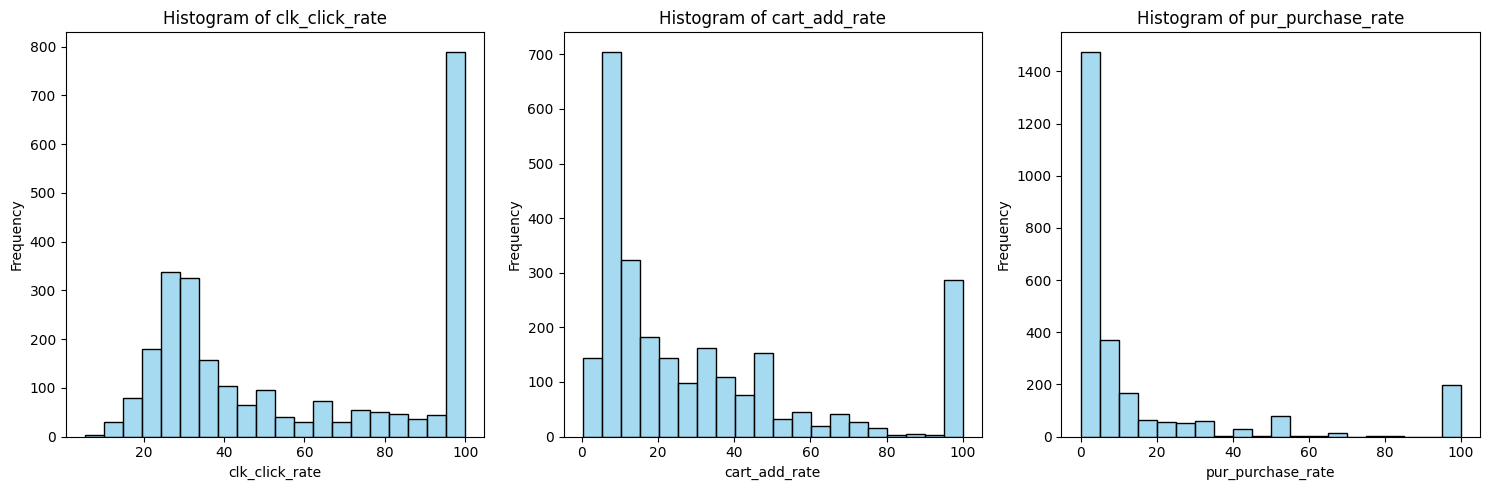

In [22]:
#Distribution of Click Rate, Cart Add Rate, and Purchase Rate
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['clk_click_rate', 'cart_add_rate', 'pur_purchase_rate']

plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[metric], kde=False, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {metric}")
    plt.xlabel(f"{metric}")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

- The three key metrics (`clk_click_rate`, `cart_add_rate`, `pur_purchase_rate`) all show **skewed distributions**.
- **While the click rate is predominantly in the 90-100% range, the cart add rate and purchase rate are mostly in the 0-20% range.**

#### Word Count, Frequency Analysis, and Query Duplication in ```search_queries```

count    2575.000000
mean        3.921553
std         2.889452
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        49.000000
Name: word_count, dtype: float64
Top 10 Frequent Words: [('toys', 1486), ('sensory', 1056), ('for', 879), ('autism', 452), ('fidget', 340), ('kids', 316), ('autistic', 256), ('stretchy', 251), ('bunmo', 207), ('children', 179), ('textured', 169), ('toy', 161), ('5-7', 136), ('strings', 133), ('adults', 108), ('special', 101), ('needs', 92), ('with', 87), ('chew', 86), ('noodles', 82)]
Number of Low Frequency Words: 360
Duplicate Query Counts:
search_query
autism sensory toys                   26
autism sensory products               26
autism toys                           26
sensory toys for autistic children    25
bunmo sensory toys                    25
autistic toys for boys 5-7            25
toys for autistic children age 5-7    25
sensory toys                          24
stretchy toys                         24
sen

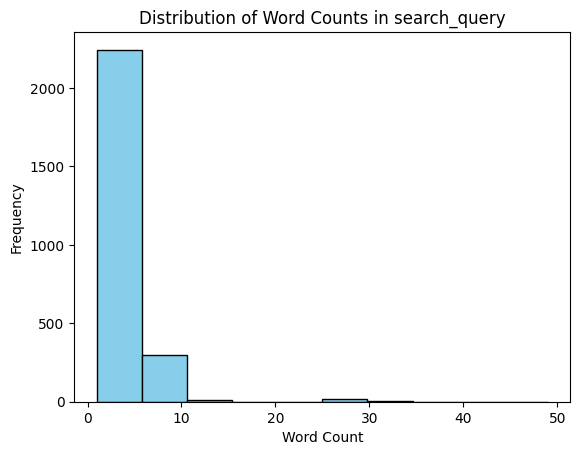

In [23]:
from collections import Counter

df['word_count'] = df['search_query'].apply(lambda x: len(x.split()))

word_count_stats = df['word_count'].describe() 
print(word_count_stats)

all_words = ' '.join(df['search_query']).split() 
word_freq = Counter(all_words)

high_freq_words = word_freq.most_common(20)
print("Top 10 Frequent Words:", high_freq_words)

low_freq_words = [word for word, freq in word_freq.items() if freq == 1] 
print("Number of Low Frequency Words:", len(low_freq_words))

query_freq = df['search_query'].value_counts()
print("Duplicate Query Counts:")
print(query_freq.head(10))

plt.hist(df['word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Counts in search_query")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


- The `search_queries` list shows that many of the queries are related to autism, indicating that the collected data is focused on this field.

#### Extract important keywords using TF-IDF method

- **TF-IDF(Term Frequency-Inverse Document Frequency)**: TF-IDF is a statistical method used to evaluate the importance of a word in a document. It combines how frequently a word appears in a document (Term Frequency, TF) with how rare the word is across the entire document set (Inverse Document Frequency, IDF).

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')  # Removing English stopwords
X_tfidf = vectorizer.fit_transform(df['search_query'])

tfidf_df = pd.DataFrame(X_tfidf.T.toarray(), index=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.T  

top_tfidf_words = tfidf_df.max(axis=1).sort_values(ascending=False).head(30) 

top_keyword_words_with_scores = []
for i in top_tfidf_words.index:
    max_index = tfidf_df.loc[i].idxmax() 
    score = tfidf_df.loc[i, max_index] 
    top_keyword_words_with_scores.append((max_index, score))  


top_keyword_words_with_scores_unique = list(set(top_keyword_words_with_scores))

print("Top 30 Unique Keywords with Highest TF-IDF Scores:")
for word, score in top_keyword_words_with_scores_unique:
    print(f"{word}: {score:.4f}")  


Top 30 Unique Keywords with Highest TF-IDF Scores:
b082d7wvt8: 1.0000
sensory: 1.0000
bunmo: 1.0000
noodlies: 1.0000
vibe: 1.0000
theraputty: 1.0000
slinky: 1.0000
fidget: 1.0000
speks: 1.0000
autism: 1.0000
figetget: 1.0000
flipazoo: 1.0000
stretchlerz: 1.0000


- Possible Reasons for Getting Only 13 Results Instead of 30 in the Deduplicated TF-IDF List:
    - **Fewer than 30 unique top words or similar TF-IDF scores**: It could be that there are fewer than 30 unique words with significant TF-IDF scores, or that the remaining words have very similar TF-IDF scores, thus preventing the list from reaching 30 distinct terms. This suggests that the search queries contain few significant keywords or that the repeated keywords are very similar.

    - **Short search queries or data focused on a specific topic**: Looking at the text characteristics, most search queries consist of 5 words or fewer, and the frequency and TF-IDF lists show a concentration on specific topics, such as 'kids', 'autism', 'sensory', 'fidget', etc. This indicates that the data might be highly focused on a few themes(toys for people who have autism).

    - **Limited amount of data**: The dataset contains only around 2600 entries, which may not be enough to generate a wide variety of significant keywords.
 
    - **specific brand names** such as Bunmo, Speks, Flipazoo and Theraputty were observed.

#### Analysis between keywords and key metrics(average click rate, cart add rate, and purchase rate)

In [25]:
# Analyzing the relationship between keywords and key metrics
# Dictionary to store the average purchase rate, click rate, and cart add rate for keywords based on TF-IDF 
rates_by_keyword = {}

for word, _ in top_keyword_words_with_scores_unique:
    
    filtered_queries = df[df['search_query'].str.contains(word, case=False, na=False)] 
    
    
    if not filtered_queries.empty: 
        avg_purchase_rate = filtered_queries['pur_purchase_rate'].mean()
        avg_click_rate = filtered_queries['clk_click_rate'].mean()
        avg_cart_add_rate = filtered_queries['cart_add_rate'].mean()
    else:
        avg_purchase_rate = avg_click_rate = avg_cart_add_rate = None 
    
    
    rates_by_keyword[word] = {
        'purchase_rate': avg_purchase_rate,
        'click_rate': avg_click_rate,
        'cart_add_rate': avg_cart_add_rate
    }


for word, rates in rates_by_keyword.items():
    print(f"Results for Queries Containing '{word}':")
    
    if rates['click_rate'] is not None:
        print(f"  Average Click Rate: {rates['click_rate']:.4f}")
    else:
        print(f"  Average Click Rate: No Queries Found")
        
    if rates['cart_add_rate'] is not None:
        print(f"  Average Cart Add Rate: {rates['cart_add_rate']:.4f}")
    else:
        print(f"  Average Cart Add Rate: No Queries Found")
        
    if rates['purchase_rate'] is not None:
        print(f"  Average Purchase Rate: {rates['purchase_rate']:.4f}")
    else:
        print(f"  Average Purchase Rate: No Queries Found")
    
    print() 


Results for Queries Containing 'b082d7wvt8':
  Average Click Rate: 81.5433
  Average Cart Add Rate: 33.9850
  Average Purchase Rate: 30.5589

Results for Queries Containing 'sensory':
  Average Click Rate: 62.3201
  Average Cart Add Rate: 36.4215
  Average Purchase Rate: 18.6495

Results for Queries Containing 'bunmo':
  Average Click Rate: 80.7253
  Average Cart Add Rate: 65.2301
  Average Purchase Rate: 47.6106

Results for Queries Containing 'noodlies':
  Average Click Rate: 39.6940
  Average Cart Add Rate: 15.8580
  Average Purchase Rate: 3.3800

Results for Queries Containing 'vibe':
  Average Click Rate: 49.7500
  Average Cart Add Rate: 16.1487
  Average Purchase Rate: 7.7273

Results for Queries Containing 'theraputty':
  Average Click Rate: 61.5550
  Average Cart Add Rate: 18.9075
  Average Purchase Rate: 7.0175

Results for Queries Containing 'slinky':
  Average Click Rate: 78.2320
  Average Cart Add Rate: 33.7620
  Average Purchase Rate: 13.8000

Results for Queries Containin

The application of **TF-IDF** revealed that:
  - **Brand names**, **product categories**, and **specific product names** are among the most significant keywords.
  - These **brand-related keywords** and **product-related keywords** are likely to influence the Click Rate, Cart Add Rate, and purchase rate.

#### Comparison of Key Metrics (Click Rate, Cart Add Rate, and Purchase Rate) Between Queries Containing Brand Keywords and Non-Brand Keywords

In [26]:
unique_words = list(set(all_words))
print(f"Number of unique words: {len(unique_words)}")
print(unique_words)

Number of unique words: 704
['kids', 'togs', 'oral', 'ass', 'play', 'needs', 'pillows', 'touching', 'x5', 'circle', 'for.adults', 'food', 'zone', 'rough', 'pk', 'severely', 'slinky', 'putty', 'stay', 'frame', '6-count', 'niño', 'six', '5-7autistic', 'in', 'inside', 'spark', 'chart', 'clothing', '20', 'cuddle', 'grip', 'stretchlerz', 'autistic', 'bumno', 'stemming', 'bottles', 'chill', 'restrainer', 'wicky', 'best', '5-7', '11', 'huggy', 'texture', 'stem', 'zu', 'regulation', 'blind', 'safety', 'art', 'disabilities', 'anti', 'froogz', 'therapy', '3-4', 'band', 'grass', 'up', 'pop', 'preschool', 'juego', 'changing', 'making', 'figits', 'chewelry', 'phsically', 'learning', 'alzheimers', 'glitter', 'stretching', 'bite', 'chewy', 'washable', 'atretchy', 'stickers', 'toobaloo', 'developmentally', 'check', 'i', 'sequin', 'disorder', 'stuffer', 'indestructible', 'todler', 'teenagers', 'stream', 'trading', 'puffer', 'tubes', '9monthnold', 'rett', 'sign', 'lap', 'fall', 'adults', 'textile', 'str

- Use generative AI (Chat GPT, Claude) to extract only the brand-name from the word list and create a list.
- Specific product categories offered by a brand or specific product names could also be included in the list. However, due to the need for context, the scope has been narrowed to focus solely on brand names.

In [27]:
brand_names = [
    'chewigem', 
    'fidgetland', 
    'specialkids.company', 
    'figetget', 
    'fidgettoys', 
    'bunmo', 
    'squishy', 
    'chewy', 
    'speks', 
    'z-vibe', 
    'fidget', 
    'figet', 
    'moluk', 
    'oombee', 
    'flipazoo', 
    'bunmoo', 
    'needoh', 
    'tangle'
]


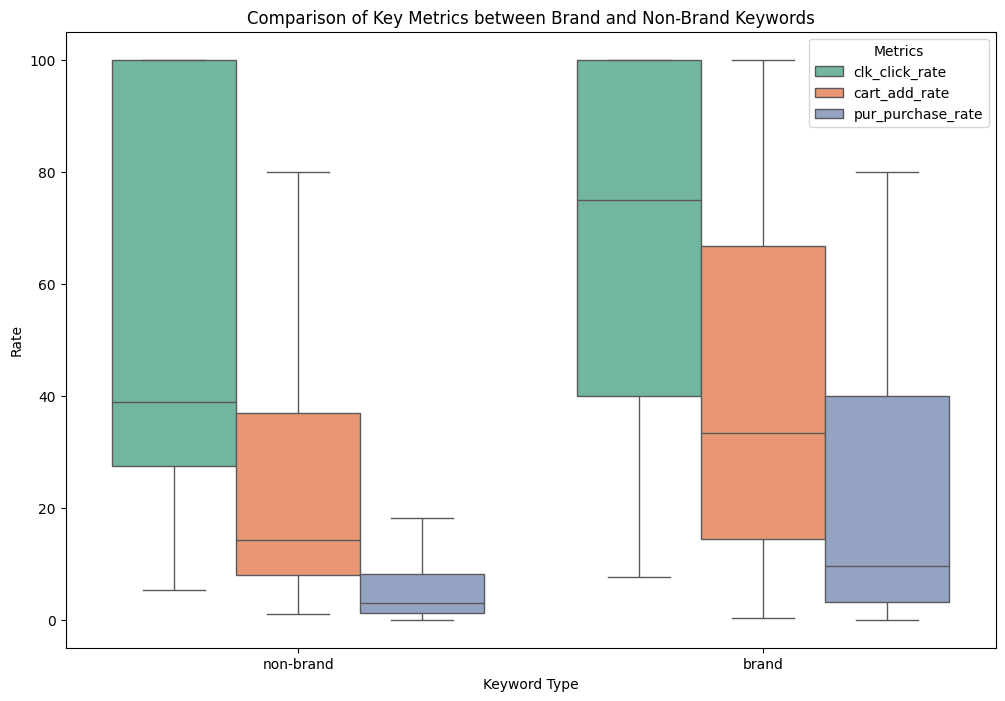

In [28]:
# Categorize queries containing brand keywords as 'brand' or 'non-brand'
def categorize_query(query):
    for brand in brand_names:
        if brand in query.lower():
            return 'brand'
    return 'non-brand'

df['category'] = df['search_query'].apply(categorize_query)

metrics = df[['category', 'clk_click_rate', 'cart_add_rate', 'pur_purchase_rate']].melt(
    id_vars=['category'], value_vars=['clk_click_rate', 'cart_add_rate', 'pur_purchase_rate'],
    var_name='metric', value_name='rate')

plt.figure(figsize=(12, 8))
sns.boxplot(data=metrics, x='category', y='rate', hue='metric', palette="Set2", showfliers=False)
plt.title('Comparison of Key Metrics between Brand and Non-Brand Keywords')
plt.ylabel('Rate')
plt.xlabel('Keyword Type')
plt.legend(title='Metrics', loc='upper right')
plt.show()


**Brand Queries**:
- **Generally Higher Performance**: Brand-related queries show higher values across all metrics (Click Rate, Cart Add Rate, and Purchase Rate). This indicates that **queries containing brand keywords tend to generate more user engagement and higher conversion rates.**
- **Higher Median**: The median line for brand queries is positioned higher compared to non-brand queries. This suggests that brand-related queries attract more attention and lead to more clicks, higher cart add rates, and better purchase rates.
Wider Interquartile Range: The interquartile range (the box itself) for brand queries is broader. This suggests that **while brand-related queries generally show better performance, there may be some outliers in certain cases.**

**Non-Brand Queries**:
- **Lower Performance**: Non-brand queries have a lower median for all metrics compared to brand-related queries. This indicates that **queries without brand names typically result in lower user engagement and conversion rates.**
- **Outliers**: There are some outliers in non-brand queries that show unexpectedly high performance. However, these outliers are fewer and less consistent when compared to the ongoing high performance observed in brand-related queries.

→ **Brand queries generally outperform non-brand queries in terms of user engagement and conversion rates, likely due to higher brand awareness and marketing efforts.**

#### Correlation among ``'clk_click_rate'``, ``'cart_add_rate'``, ``'pur_purchase_rate'``

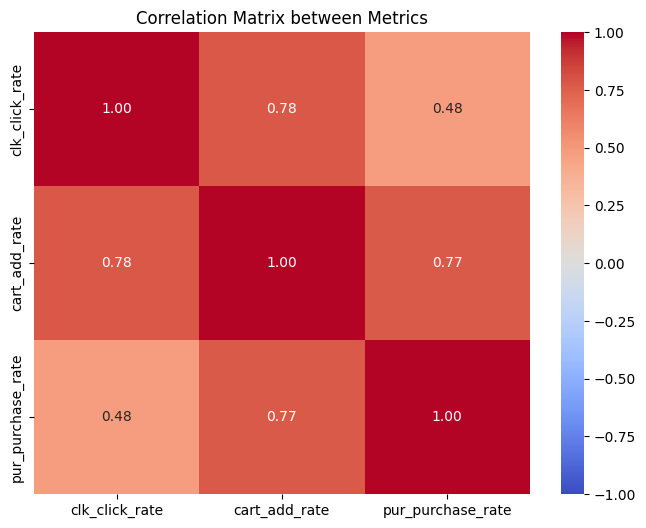

In [29]:
correlation_matrix = df[['clk_click_rate', 'cart_add_rate', 'pur_purchase_rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Metrics')
plt.show()


- CTR served as the first point of interaction for users and had a significant impact on both Cart Add Rate and Purchase Rate. **Optimizing CTR can be considered a crucial strategy for improving overall user conversion rates.**

## 3. Hypothesis Development

### 3.1 Identified Patterns

**Click Rate, Cart Add Rate, and Purchase Rate**:  
- The click rate is high (90-100%), but cart add and purchase rates are low (0-20%), suggesting high initial user engagement but a significant drop-off in later stages.  

  
**Brand Queries**:  
  - **Higher Performance**: Brand-related queries have higher performance across all metrics (Click Rate, Cart Add Rate, Purchase Rate).  
  - **Higher Median & Broader Range**: Brand queries have a higher median and a wider interquartile range, indicating generally better performance with some outliers.  

  
**Non-Brand Queries**:  
  - **Lower Performance**: Non-brand queries perform worse overall.  
  - **Outliers**: There are some outliers with unexpectedly high performance, but they are fewer and less consistent.  

  
**Importance of Brand and Product Keywords**:  
  - **TF-IDF** highlights that brand names, product categories, and specific product names are key drivers of user engagement and conversion rates.  



**Data Limitations**:  
  - The dataset is small (~2600 entries) and focuses on specific themes, limiting keyword diversity.


### 3.2 Formulated Hypotheses

- **Hypothesis**:  
  **If a search query contains brand-related keywords, the ad click-through rate (```clk_click_rate```) will increase.**

- **Statistical Analysis**:  
  Initially, we plan to test this hypothesis using an **Independent Samples t-test** (also known as a two-sample t-test) to compare the CTRs between the two groups. This test is appropriate because it will allow us to determine if the mean CTR for brand-related queries is significantly different from the mean CTR for non-brand queries.


## 4. Hypothesis Testing

### 4.1 Assumption Checks & Data Transformations

To test the hypothesis, we first examined the assumptions of the **Independent Samples t-test**, especially the normality assumption, which is critical for the validity of the test.

- **Null Hypothesis (H0)**: There is no significant difference in the mean CTR between brand-related and non-brand queries.  
  (H0: μ_brand = μ_non_brand)

- **Alternative Hypothesis (H1)**: There is a significant difference in the mean CTR between brand-related and non-brand queries.  
  (H1: μ_brand ≠ μ_non_brand)

#### Assumption Checks for Independent Samples t-Test

**Normality Test**  
Since the Independent Samples t-test requires the assumption of normality, normality tests were conducted to verify that the data met this assumption.

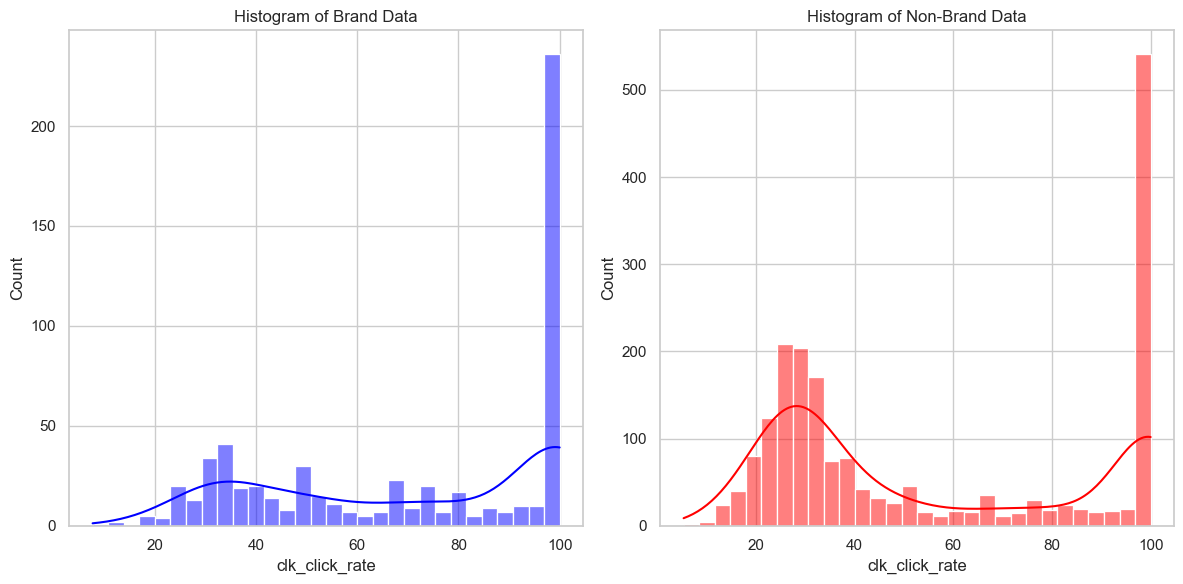

In [30]:
brand_data = df[df['category'] == 'brand']['clk_click_rate'] 
non_brand_data = df[df['category'] == 'non-brand']['clk_click_rate']

# Histogram
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(brand_data, kde=True, color='blue', bins=30)
plt.title("Histogram of Brand Data")

plt.subplot(1, 2, 2)
sns.histplot(non_brand_data, kde=True, color='red', bins=30)
plt.title("Histogram of Non-Brand Data")

plt.tight_layout()
plt.show()


- From the histogram, it can be seen that both datasets are **heavily skewed to the right**. Therefore, based on a rough visualization, it was determined that the data likely does not meet the assumption of normality. Attempts were made to remove outliers.

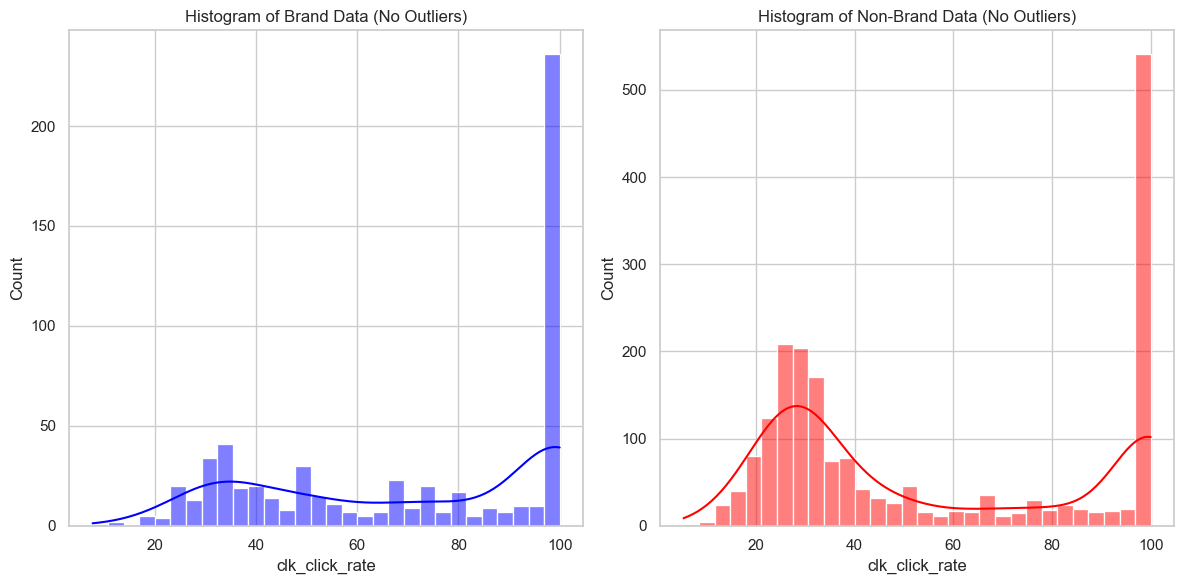

In [31]:
# Outlier criteria: Below Q1 - 1.5IQR or above Q3 + 1.5IQR

# Brand Data Outlier Removal
Q1_brand = brand_data.quantile(0.25)
Q3_brand = brand_data.quantile(0.75)
IQR_brand = Q3_brand - Q1_brand
lower_bound_brand = Q1_brand - 1.5 * IQR_brand
upper_bound_brand = Q3_brand + 1.5 * IQR_brand
brand_data_no_outliers = brand_data[(brand_data >= lower_bound_brand) & (brand_data <= upper_bound_brand)]

# Non-Brand Data Outlier Removal
Q1_non_brand = non_brand_data.quantile(0.25)
Q3_non_brand = non_brand_data.quantile(0.75)
IQR_non_brand = Q3_non_brand - Q1_non_brand
lower_bound_non_brand = Q1_non_brand - 1.5 * IQR_non_brand
upper_bound_non_brand = Q3_non_brand + 1.5 * IQR_non_brand
non_brand_data_no_outliers = non_brand_data[(non_brand_data >= lower_bound_non_brand) & (non_brand_data <= upper_bound_non_brand)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(brand_data_no_outliers, kde=True, color='blue', bins=30)
plt.title("Histogram of Brand Data (No Outliers)")

plt.subplot(1, 2, 2)
sns.histplot(non_brand_data_no_outliers, kde=True, color='red', bins=30)
plt.title("Histogram of Non-Brand Data (No Outliers)")

plt.tight_layout()
plt.show()


- Even after removing outliers, it can still be observed that the data is heavily skewed to the right.
- To meet the normality assumption, attempts were made to apply various transformation(Logit, Log, Arcsine,Box-Cox)

- **Log Transform**: Applies a logarithm to data to reduce skewness and compress scale differences. Used for data with a right-skewed distribution or large value ranges.
- **Box-Cox Transform**: A power transform that makes data more normally distributed. Used for continuous, positive data requiring normality in analysis.

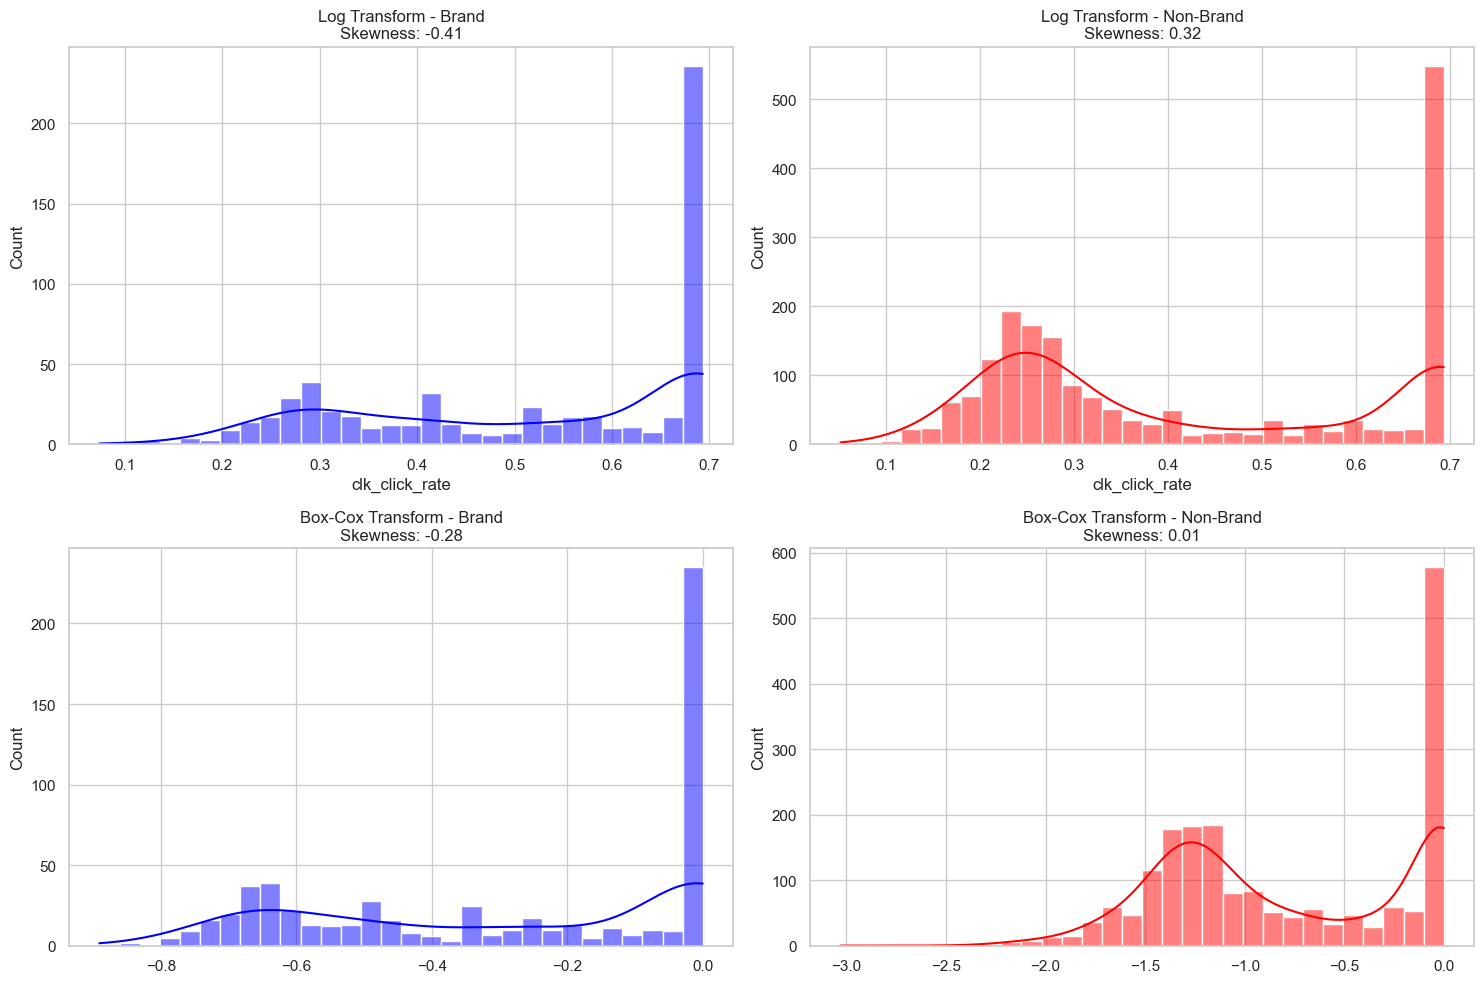


Brand Data:

Log Transform:
Shapiro-Wilk test: statistic=0.8397, p-value=0.0000
Skewness: -0.4104

Box-Cox Transform:
Shapiro-Wilk test: statistic=0.8340, p-value=0.0000
Skewness: -0.2847

Non-Brand Data:

Log Transform:
Shapiro-Wilk test: statistic=0.8298, p-value=0.0000
Skewness: 0.3211

Box-Cox Transform:
Shapiro-Wilk test: statistic=0.8828, p-value=0.0000
Skewness: 0.0061


In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Scaling (0-100 → 0-1)
brand_scaled = brand_data_no_outliers / 100
non_brand_scaled = non_brand_data_no_outliers / 100

# Adding epsilon for boundary value handling
epsilon = 1e-10
brand_adjusted = np.clip(brand_scaled, epsilon, 1-epsilon)
non_brand_adjusted = np.clip(non_brand_scaled, epsilon, 1-epsilon)

# 2. Log and Box-Cox Transforms
# Log Transform
brand_log = np.log1p(brand_scaled)
non_brand_log = np.log1p(non_brand_scaled)

# Box-Cox Transform
brand_boxcox, brand_lambda = stats.boxcox(brand_scaled + epsilon)  # epsilon을 추가하여 0값을 방지
non_brand_boxcox, non_brand_lambda = stats.boxcox(non_brand_scaled + epsilon)

# 3. Visualization
plt.figure(figsize=(15, 10))

# Log Transform
plt.subplot(2, 2, 1)
sns.histplot(brand_log, kde=True, color='blue', bins=30)
plt.title(f"Log Transform - Brand\nSkewness: {stats.skew(brand_log):.2f}")

plt.subplot(2, 2, 2)
sns.histplot(non_brand_log, kde=True, color='red', bins=30)
plt.title(f"Log Transform - Non-Brand\nSkewness: {stats.skew(non_brand_log):.2f}")

# Box-Cox Transform
plt.subplot(2, 2, 3)
sns.histplot(brand_boxcox, kde=True, color='blue', bins=30)
plt.title(f"Box-Cox Transform - Brand\nSkewness: {stats.skew(brand_boxcox):.2f}")

plt.subplot(2, 2, 4)
sns.histplot(non_brand_boxcox, kde=True, color='red', bins=30)
plt.title(f"Box-Cox Transform - Non-Brand\nSkewness: {stats.skew(non_brand_boxcox):.2f}")

plt.tight_layout()
plt.show()

# Normality Test (Shapiro-Wilk test)
transformations = {
    'Brand': {
        'Log': brand_log,
        'Box-Cox': brand_boxcox
    },
    'Non-Brand': {
        'Log': non_brand_log,
        'Box-Cox': non_brand_boxcox
    }
}

for group in ['Brand', 'Non-Brand']:
    print(f"\n{group} Data:")
    for transform_name, data in transformations[group].items():
        stat, p_value = stats.shapiro(data)
        print(f"\n{transform_name} Transform:")
        print(f"Shapiro-Wilk test: statistic={stat:.4f}, p-value={p_value:.4f}")
        print(f"Skewness: {stats.skew(data):.4f}")


- Applied various logarithmic transformations suitable for the CTR data, but all of them resulted in very small p-values, indicating that **none of the transformations satisfied the normality assumption.**
- Even after transformations, the data still exhibits strong right skew, leading us **to decide to use a non-parametric test instead of the t-test.**

### 4.2 Statistical Test

Since the data does not meet the assumptions required for parametric testing, we used the **Mann-Whitney U Test**.

In [33]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test
stat, p_value = mannwhitneyu(brand_data_no_outliers, non_brand_data_no_outliers, alternative='two-sided')

print("Mann-Whitney U Test statistic:", stat)
print(f"P-value: {p_value:.50f}")

if p_value < 0.05:
    print("There is a significant difference between the two groups (reject H0).")
else:
    print("There is no significant difference between the two groups (fail to reject H0).")


Mann-Whitney U Test statistic: 774240.5
P-value: 0.00000000000000000000000000013307297795857700101875
There is a significant difference between the two groups (reject H0).


Since the p-value is very small, **we reject the null hypothesis.** This indicates that **there is a significant difference between the brand-related query group and the non-brand query group.**

### 4.3 Insights

Based on the results of the Mann-Whitney U Test, we found that there is a significant difference between brand-related and non-brand-related queries in terms of CTR. This insight suggests that **brand-related queries tend to attract more user attention, which could be leveraged to enhance ad targeting strategies.**

## 5. Clustering for Data Insights

### 5.1 DBSCAN Clustering

- The goal is **to cluster the records with the 'brand' value in the 'category' column, which contains brand-related keywords, in order to uncover detailed patterns within these specific queries.**

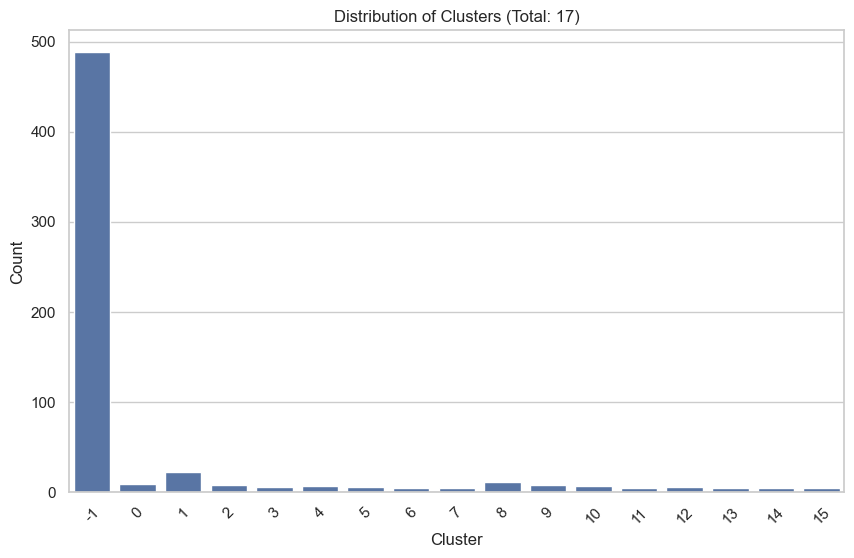

Cluster -1 Example Data:
    week                                       search_query  \
6      3  bunmo textured stretchy strings 6pk | calming ...   
13     3                    bunmo textured stretchy strings   
15     3                       fidget toys for toddlers 1-3   
20     3                                    stretchy fidget   
25     3                       oodles of noodles fidget toy   

    search_query_score  search_quey_volume  imp_total_count  clk_total_count  \
6                    7                   4              159                4   
13                  14                   4              109                3   
15                  16                2745            57638             1012   
20                  21                 109             2698               52   
25                  26                 108             2176               32   

    clk_click_rate  cart_total_count  cart_add_rate  pur_total_count  \
6           100.00                 4       

In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

brand_data = df[df['category'] == 'brand'].drop(columns=['category'])

# one-hot encoding for categorical data
brand_data_encoded = pd.get_dummies(brand_data, columns=['search_query'], drop_first=True)

# Scaling of Numerical Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(brand_data_encoded)

# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5) 
brand_data['cluster'] = dbscan.fit_predict(features_scaled)

unique_clusters = brand_data['cluster'].nunique()

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=brand_data)
plt.title(f'Distribution of Clusters (Total: {unique_clusters})')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

for cluster in brand_data['cluster'].unique():
    print(f"Cluster {cluster} Example Data:")
    print(brand_data[brand_data['cluster'] == cluster].head(5))
    print("\n")


- Based on the results, excluding the noise cluster `-1`, most clusters are composed of a single identical search query.

In [35]:
cluster_unique_queries = {}

for cluster in brand_data['cluster'].unique():
    cluster_data = brand_data[brand_data['cluster'] == cluster]
    unique_queries = cluster_data['search_query'].unique()
    cluster_unique_queries[cluster] = unique_queries

    print(f"Cluster {cluster}: Unique 'search_query' List")
    print(unique_queries)
    print("\n")


Cluster -1: Unique 'search_query' List
['bunmo textured stretchy strings 6pk | calming & fun monkey noodles | super sensory stretchy worms for stress relief & stimulation | popular autism toys'
 'bunmo textured stretchy strings' 'fidget toys for toddlers 1-3'
 'stretchy fidget' 'oodles of noodles fidget toy'
 'stretchy strings fidget toys' 'autism fidget toys for kids'
 'bunmo super sensory textured stretchy strings'
 'bunmo super sensory stretchy strings 6pk'
 'bunmo super sensory stretchy strings' 'oodles of noodles fidget'
 'fidget toys adult down syndrome' 'bunmo sensory'
 'bunmo super sensory stretch strings'
 'bunmo textured stretchy strings 6pk | calming & fun monkey noodles | super sensory stretchy worms for stress relief & sbunmo textured stretchy strings 6pk | calming & fun monkey noodles | super sensory stretchy worms for stress relief & stimulation | popular autism toystimulation | popular autism toys'
 'fidget toys for thumb suckers' 'bunmo sensory toys'
 'stretchy fidget 

- Based on a more detailed analysis focused on `search_query` column, **Cluster `-1`** is classified as noise(in DBSCAN clustering algorithm, a cluster labeled as -1 represents noise), but it contains a large amount of data with diverse search queries, whereas most of the **other clusters** are predominantly composed of a single search query.
- The search queries in cluster`0` and cluster `15` are identical, yet they are classified into different clusters.

In [36]:
cluster_metrics = brand_data.groupby('cluster')[['clk_click_rate', 'cart_add_rate', 'pur_purchase_rate']].mean()
cluster_counts = brand_data['cluster'].value_counts()
cluster_metrics['count'] = cluster_metrics.index.map(cluster_counts)
print(cluster_metrics)

         clk_click_rate  cart_add_rate  pur_purchase_rate  count
cluster                                                         
-1            71.191906      46.111783          29.591947    488
 0            34.061111      12.544444           3.430000      9
 1            69.612727      38.068636          13.640909     22
 2            45.843750      21.428750           8.400000      8
 3            78.253333      70.873333          32.618333      6
 4            31.261429       9.657143           2.301429      7
 5            36.218333      12.573333           2.586667      6
 6            44.840000      16.344000           4.162000      5
 7            64.786000      34.500000          20.858000      5
 8            66.138333      52.980000          29.363333     12
 9            72.887500      60.863750          29.225000      8
 10           81.608571      20.462857           3.282857      7
 11           97.662000      40.362000           9.354000      5
 12           86.520000  

#### Result

**1. Cluster-wise Comparison of `clk_click_rate`, `cart_add_rate`, `pur_purchase_rate`**  
    - **CTR (`clk_click_rate`)**: It is observed that more than half of the clusters have a CTR of over 50% for brand-related queries. In particular, clusters `13` ('stretchy fidget toy'), `14` ('fidgets for autism'), and `15` ('stretchy fidget toy') have an exceptionally high CTR close to 100%. These clusters share the common keyword **'fidget'**, which is also present in other clusters. **Therefore, the word `fidget` can be seen as a key contributor to increasing CTR.**  
    - **Cart Add Rate**: Clusters `3` ('bunmo 6pk textured noodle sensory toys'), `8` ('bunmo sensory toys - calming textured silly stretchy strings'), and `9` ('fidget toys and textured sensory toys by bunmo') have a high cart add rate. **These clusters all include the brand name 'bunmo', which specializes in sensory toys.**  
    - **Purchase Rate**: Similar to the cart add rate, clusters `3`, `8`, `9`, and `-1` show relatively high purchase rates.

- **The word `fidget`is a key contributor to increasing CTR.**
- In conclusion, by analyzing cart add rate and purchase rate, it is evident that **search queries containing the brand name 'bunmo', which specializes in sensory toys, have both high cart conversion rates and high purchase rates.**

**2. Analysis of Clusters with Low Conversion Rates**
    - **Clusters with high CTR but low conversion rates (cart add rate and purchase rate)**: `10` ('fidget'). This cluster has a very high CTR but extremely low cart add rate and purchase rate. This indicates that users click, but the actual conversion to a purchase does not occur.
    - **Clusters with a low purchase rate compared to cart add rate**: Cluster `1` ('bunmo sensory toys'), `2` ('sensory noodles fidget stretch toys'), and `10` ('fidget'). These clusters have a high cart add rate, but the purchase rate is low.

- The clusters mentioned in item 2 have a wider search query range compared to those in item 1. Thus, it can be inferred that **the narrower the search query range, the higher the conversion rate.**


### 5.2 Insights from Clustering

- The word 'fidget' can be seen as a key contributor to increasing CTR. →  **Using this keyword can help refine customer targeting and enable focused marketing towards users who are likely to be interested.**
- Search queries containing the brand 'bunmo', a company specializing in sensory toys, showed higher conversion rates during the purchasing process. →  This suggests that **brand awareness and trust in the brand have a significant impact on users' subsequent actions.**
- The narrower the search query range, the higher the conversion rate. →  The more specific the targeting for a particular brand or product, the higher the likelihood of attracting users interested in that product, leading to conversions. This indicates that **segmented targeting is effective, so detailed advertising focusing on specific brands or features is necessary for users who search broad queries.**

## 6. Insights and Future Work
### Insights  
1. **Through the analysis of search queries, it was found that most of the collected keywords are related to autism.** This conclusion suggests that the insights can be applied to customers related to 'autism' on the Amazon website.
2. **Based on the results of the Mann-Whitney U Test, we found that there is a significant difference between brand-related and non-brand-related queries in terms of CTR.** This suggests that brand-related queries tend to attract more user attention, which could be leveraged to enhance ad targeting strategies.
3. **The word 'fidget' can be seen as a key contributor to increasing CTR.** Using this keyword can help refine customer targeting and enable focused marketing towards users who are likely to be interested.
4. **Search queries related to the brand 'bunmo' showed higher conversion rates.** This suggests that brand awareness and trust in the brand have a significant impact on users' purchasing decisions.
5. **The narrower the search query range, the higher the conversion rate.** The more specific the targeting for a particular brand or product, the higher the likelihood of attracting users interested in that product, leading to conversions. This indicates that segmented targeting is effective, so detailed advertising focusing on specific brands or features is necessary for users who search broad queries.

### Future Work
- **Expand the dataset** by incorporating more diverse variables, such as demographic and behavioral information, to improve the robustness of the analysis.
- **Explore advanced models** using the enhanced dataset to capture deeper insights and enhance the predictive accuracy of future analyses.
- Due to the **data imbalance** and **high skewness**, it was challenging to build accurate predictive models with the current data. Addressing these issues through data collection improvements and transformation would be necessary for better prediction outcomes.


## 7. Conclusion
- This project analyzed the differences in **CTR between branded and non-branded queries**, revealing that **branded queries** generally attract more user engagement.
- **The word 'fidget'** was found to be a key contributor to higher CTR, suggesting that incorporating this keyword can enhance customer targeting by focusing on users likely interested in fidget-related products.
- Search queries related to the brand **'bunmo'** demonstrated higher conversion rates, indicating that **brand awareness** and **trust** have a significant influence on users' purchasing decisions. This finding emphasizes the importance of building strong brand recognition and trust in driving conversions.
- The analysis also showed that **the narrower the search query range, the higher the conversion rate**. This suggests that more **specific and targeted marketing efforts**, focusing on particular products or brands, are more effective in attracting users with high purchase intent. For broader queries, it would be beneficial to emphasize the specific **brand** or **features** in ads to better capture the attention of interested users and drive conversions.
